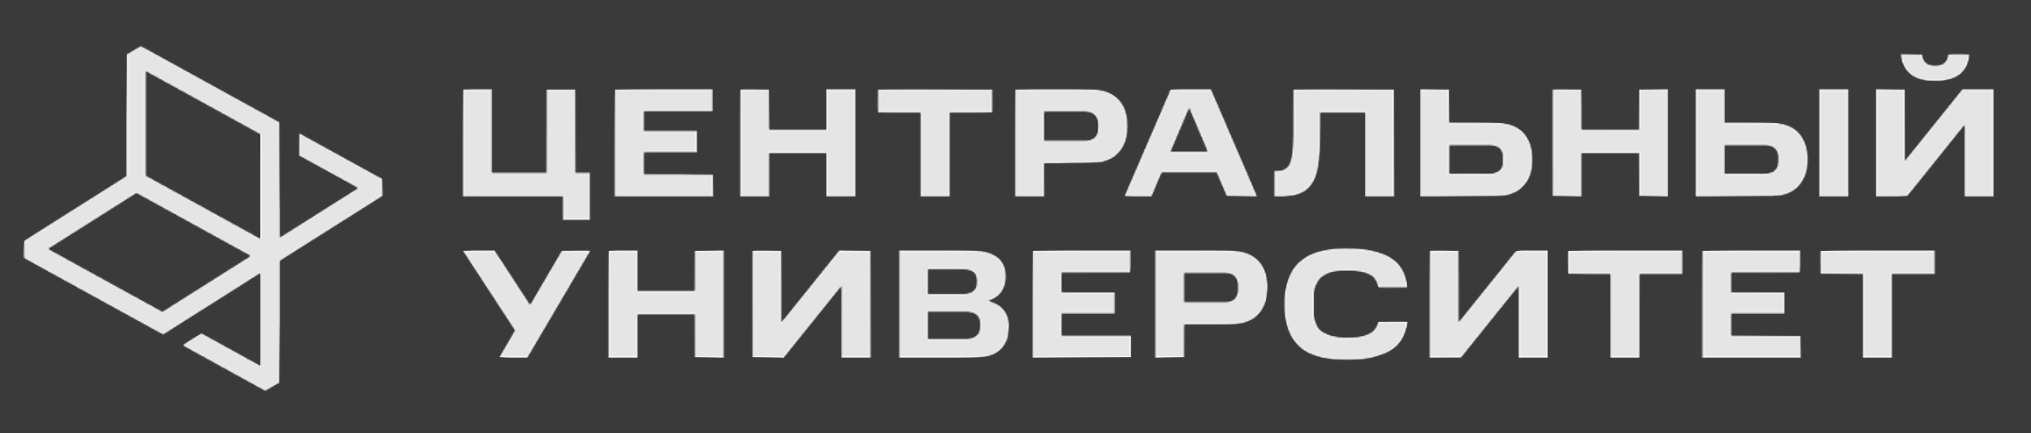

# Домашняя работа по теме «Вероятностное обучение»

Прежде чем приступить к задачам, импортируй библиотеки:


In [1]:
import plotly.graph_objects as go
import numpy                as np
import pandas               as pd

import kagglehub
import itertools
import random
import os

ModuleNotFoundError: No module named 'kagglehub'

## Задача регрессии на наборе данных `Diabetes Dataset`
Diabetes Dataset — это набор данных для задач регрессии, применяемый в машинном обучении и статистике. Он используется для установления взаимосвязи между медицинскими характеристиками и прогрессированием заболевания.

Информация о наборе данных:

- **Источник:** модуль sklearn.datasets, основанный на реальных медицинских исследованиях.

- **Применение:** прогнозирование прогрессирования диабета через год на основе исходных медицинских показателей.

- **Характеристики:**
   * Размер выборки — 442 пациента.
   * Целевая  (зависимая) переменная — прогрессирование заболевания. Это количественная мера прогрессирования диабета через год после исходных измерений (она непрерывна).
   * Характеристики (независимые переменные) — 10 исходных переменных:

<!-- Diabetes Dataset - это широко используемый в машинном обучении и статистике набор данных, предназначенный для решения задачи регрессии. Он ориентирован на прогнозирование прогрессирования диабета на основе различных исходных переменных. Этот набор данных особенно полезен для понимания взаимосвязи между медицинскими характеристиками и прогрессированием заболевания, что делает его распространенным выбором для регрессионного анализа и оценки моделей.
Обзор набора данных: -->

  <!-- Источник: набор данных — это часть модуля sklearn.datasets. Этот набор создан на основе реальных медицинских исследований.
  Цель: прогнозирование прогрессирования диабета через год на основе исходных медицинских показателей.

  Размер:
        Характеристики: 10 исходных переменных (непрерывных и стандартизированных).
        Выборки: 442 пациента.
        Целевая переменная: непрерывная мера прогрессирования заболевания диабетом.

Характеристики (независимые переменные):\ -->

| | |
|----|----|
 |   Age    | Возраст пациента (стандартизированный)|
  |  Sex    | Пол пациента (стандартизированный)|
  |  BMI    | Индекс массы тела, показатель содержания жира в организме, основанный на весе и росте|
   | BP     | Среднее артериальное давление|
  |  S1 - S6| Шесть измерений сыворотки крови, включая холестерин и другие биомаркеры|


Характеристики были нормализованы: среднее значение приведено к `0`, а  стандартное отклонение — к `1`. Это упрощает их использование в регрессионных моделях.

Ниже приведён краткий конспект лонгрида по теме «Вероятностное обучение». Эти формулы понадобятся тебе для решения задач.

#### Модель байесовской линейной регрессии

---
Априорное распределение параметров модели

$$
p(\mathbf{w}) = N(\mathbf{m}_0, \mathbf{S}_0),
$$

где $\mathbf{m}_0$ — априорное среднее, например $\mathbf{m}_0 = \mathbf{0}$; \\
$\mathbf{S}_0$ — априорная ковариационная матрица, например $\mathbf{S}_0 = \frac{1}{\alpha} \mathbf{I}$; здесь $\mathbf{I}$ — квадратная еденичная матрица.

---

Функция правдоподобия — вероятность наблюдения данных $\mathbf{y}$ с учётом $\mathbf{X}$ и $\mathbf{w}$ составляет:

$$
p(\mathbf{y} | \mathbf{X}, \mathbf{w}) = N(\mathbf{X} \mathbf{w}, \beta^{-1} \mathbf{I}),
$$
где $\beta$ — точность (обратная дисперсия) шума; \\
$\mathbf{X}$ — матрица признаков; \\
$\mathbf{y}$ — наблюдаемые целевые значения.

---

Апостериорное распределение параметров модели $\mathbf{w}$ определяется с помощью правила Байеса:

$$
p(\mathbf{w} | \mathbf{X}, \mathbf{y}) = N(\mathbf{m}_N, \mathbf{S}_N).
$$

- Апостериорная ковариационная матрица:
  $$
  \mathbf{S}_N^{-1} = \mathbf{S}_{N-1}^{-1} + \beta \mathbf{X}^\top \mathbf{X}.
  $$

- Апостериорное среднее:
  $$
  \mathbf{m}_N = \mathbf{S}_N \left( \mathbf{S}_{N-1}^{-1} \mathbf{m}_{N-1} + \beta \mathbf{X}^\top \mathbf{y} \right).
  $$

---

**Предсказание**

Прогнозируемое распределение для нового входа $\mathbf{x}_*$ это:

$$
p(\hat{y}_* | \mathbf{x}_*, \mathbf{X}, \mathbf{y}) = N(\mu_*, \sigma_*^2),
$$

где прогнозируемое среднее:
  $$
  \mu_* = \mathbf{x}_*^\top \mathbf{m}_N,
  $$
прогнозируемая дисперсия:
  $$
  \sigma_*^2 = \frac{1}{\beta} + \mathbf{x}_*^\top \mathbf{S}_N \mathbf{x}_*.
  $$
---

### Подготовительные шаги
Перед тем как приступить к задачам, загрузи  модули.

In [2]:
import plotly.graph_objects as go
import pandas               as pd
import numpy                as np

from sklearn.datasets        import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from sklearn.metrics         import mean_squared_error

from sklearn.metrics import mean_squared_error, r2_score

Загрузи набор данных.

In [3]:
data = load_diabetes()
X, y = data.data, data.target

print( data.DESCR )

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

Сделай предобработку данных. Стандартизируй данные и добавь столбец, состоящий из единиц справа.

In [4]:
# Стандартизируем данные
scaler = StandardScaler()
X = scaler.fit_transform(X)

num_samples, num_features = X.shape

X = np.hstack((X, np.ones((num_samples,1))))

num_samples, num_features = X.shape

Разбей набор данных на три выборки: основную тренировочную, дополнительную и тестовую. Также выбери случайный пример из тестовой выборки, чтобы отслеживать, как меняется решение.

*Как работать с дополнительной выборкой, узнаешь ниже.*

<!-- Разобьем наш набор данных на три выборки. Базовую тренировочную, дополнительную выборку и тестовую. Как работать с дополнительной выборкой вы узнаете ниже. Также выберем случайный пример из тестовой выборки, который позволит проследить эволюцию нашего решения. -->

In [5]:
X_pool , X_test, y_pool , y_test = train_test_split(X     , y     , test_size=0.2, random_state=42)
X_train, X_pool, y_train, y_pool = train_test_split(X_pool, y_pool, test_size=0.8, random_state=42)

sample_idx = np.random.randint(X_test.shape[0])

x_test_sample = X_test[sample_idx].reshape(1, -1)
y_test_sample = y_test[sample_idx]



### Задача 1.1 [5 баллов]



Реализуй модель байесовской линейной регрессии согласно следующим формулам:

---

- Априорная ковариационная матрица:
  $$
  \mathbf{S}_0 = \frac{1}{\alpha} \mathbf{I},
  $$
  где $\mathbf{I}$ — единичная квадратная матрица (размер соответствует числу параметров модели).

- Априорное среднее:
  
  $$\mathbf{m}_0 = 0,$$ где $\mathbf{m}_0$ — нулевой вектор (размер соответствует числу параметров модели).

---

- Апостериорная ковариационная матрица:
  $$
  \mathbf{S}_N^{-1} = \mathbf{S}_{N-1}^{-1} + \beta \mathbf{X}^\top \mathbf{X}.
  $$


- Апостериорное среднее:
  $$
  \mathbf{m}_N = \mathbf{S}_N \left( \mathbf{S}_{N-1}^{-1} \mathbf{m}_{N-1} + \beta \mathbf{X}^\top \mathbf{y} \right),
  $$


где $\mathbf{X}$ — текущая матрица признаков.

---

In [6]:
# Байесовская линейная регрессия
class BayesianLinearRegression:
    def __init__(self, n_features, alpha=1.0, beta=1.):
        """
        Bayesian Linear Regression model.
        Parameters:
        - alpha: Prior precision (1 / variance of weights).
        - beta: Precision of noise in the data.
        """
        self.alpha, self.beta = alpha, beta
        self.S_0 = np.eye(n_features) / alpha
        self.m_0 = np.zeros(n_features)
        self.S_N = self.S_0
        self.m_N = self.m_0

    def fit(self, X, y):
        """Fits the Bayesian Linear Regression model."""
        S_0_inv = np.linalg.inv(self.S_0)
        S_N_inv = S_0_inv + self.beta * X.T @ X
        self.S_N = np.linalg.inv(S_N_inv)
        self.m_N = self.S_N @ (S_0_inv @ self.m_0 + self.beta * X.T @ y)

    def predict(self, X, return_std=False):
        """
        Predicts mean and optionally variance for the input data.
        Parameters:
        - X: Input features.
        - return_std: If True, returns standard deviation of predictions.
        """
        y_mean = X @ self.m_N
        if return_std:
            y_var = 1 / self.beta + np.sum(X @ self.S_N * X, axis=1)
            y_std = np.sqrt(y_var)
            return y_mean, y_std
        return y_mean

In [7]:
n_features = X_test.shape[1]
model = BayesianLinearRegression(n_features, alpha=1.0, beta=1.0)

### Задача 1.2 [5 баллов]

Реализуй схему онлайн-обучения для итеративного улучшения модели, выбирая наиболее информативные примеры из немаркированного набора данных.

Итерационный процесс настройки модели:

- Настрой модель байесовской линейной регрессии на обучающем наборе примеров.
- Выполни предсказание на дополнительном наборе данных.
- Выбери пример с наибольшей неопределённостью (при предсказании возвращается `y_mean` и `y_std`, неопределённость — это `y_std`).
- Добавь этот пример в обучающий набор данных и удали его из дополнительного набора данных.
- Для тестовой выборки нарисуй график `mean_squared_error`.
- Повторяй до тех пор, пока не будет достигнут критерий остановки (например, фиксированное количество итераций) или будет исчерпан дополнительный набор данных.

<!-- ### Задача 2.2 [3 балла]

Реализуй схему онлайн обучения для итеративного улучшения модели путем запроса наиболее информативных примеров из немаркированного набора данных.

1. Предварительные шаги

- Разбей выборку на тестовую и тренировочную в соотношении 0.2 и 0.8;
- Тренировочную выборку разбей на небольшой обучающий набор и валидационный набор.

2. Итерационный процесс настройки модели

- Обучи модель линейной регрессии Байеса на обучающем наборе примеров;
- Выполните предсказание на валидационном тестовых наборах данных.
- Для валидационых результатов выберите пример с наибольшей неопределенностью (при предсказании возвращается y_mean и y_std, неопределенность это y_std). Пример с наибольшей неопределенностью добавьте в обучающий набор данных.
- Для тестовой выборки нарисуйте график `mean_squared_error`
- Повторяйте до тех пор, пока не будет достигнут критерий остановки (например, фиксированное количество итераций). -->

In [8]:
# Цикл онлайн обучения модели
n_queries, _ = X_pool.shape
mse_history, accuracy_history, posterior_history = [],[],[]

model.fit(X_train, y_train)
posterior_history.append(model.m_N)  

for i in range(n_queries):
    y_mean_pool, y_std_pool = model.predict(X_pool, return_std=True)
    uncertainty = y_std_pool
    most_uncertain_index = np.argmax(uncertainty)
    
    X_train_new = X_pool[most_uncertain_index, :].reshape(1, -1)
    y_train_new = y_pool[most_uncertain_index].reshape(1, -1)

    X_train = np.vstack((X_train, X_train_new))
    y_train = np.vstack((y_train.reshape(-1, 1), y_train_new))
    y_train = y_train.flatten()  

    X_pool = np.delete(X_pool, most_uncertain_index, axis=0)
    y_pool = np.delete(y_pool, most_uncertain_index, axis=0)

    model.fit(X_train, y_train)
    posterior_history.append(
        model.m_N
    )  
    
    y_test_pred = model.predict(X_test)
    mse         = mean_squared_error(y_test, y_test_pred)
    accuracy    = r2_score(y_test, y_test_pred)  # R-squared as accuracy
    mse_history     .append(mse     )
    accuracy_history.append(accuracy)

    print(f"Iteration {i + 1}/{n_queries}, MSE: {mse:.4f}, R2 Score: {accuracy:.4f}")

Iteration 1/283, MSE: 3601.3140, R2 Score: 0.3203
Iteration 2/283, MSE: 3622.3014, R2 Score: 0.3163
Iteration 3/283, MSE: 3481.7024, R2 Score: 0.3428
Iteration 4/283, MSE: 3475.3463, R2 Score: 0.3440
Iteration 5/283, MSE: 3456.3552, R2 Score: 0.3476
Iteration 6/283, MSE: 3492.3779, R2 Score: 0.3408
Iteration 7/283, MSE: 3494.7687, R2 Score: 0.3404
Iteration 8/283, MSE: 3535.2207, R2 Score: 0.3327
Iteration 9/283, MSE: 3357.6098, R2 Score: 0.3663
Iteration 10/283, MSE: 3415.2678, R2 Score: 0.3554
Iteration 11/283, MSE: 3378.9047, R2 Score: 0.3622
Iteration 12/283, MSE: 3383.4064, R2 Score: 0.3614
Iteration 13/283, MSE: 3373.3058, R2 Score: 0.3633
Iteration 14/283, MSE: 3296.3308, R2 Score: 0.3778
Iteration 15/283, MSE: 3240.4522, R2 Score: 0.3884
Iteration 16/283, MSE: 3253.1533, R2 Score: 0.3860
Iteration 17/283, MSE: 3266.3475, R2 Score: 0.3835
Iteration 18/283, MSE: 3255.6913, R2 Score: 0.3855
Iteration 19/283, MSE: 3248.2490, R2 Score: 0.3869
Iteration 20/283, MSE: 3296.4560, R2 Sco

In [9]:
# Plot MSE trends
fig_mse = go.Figure()
fig_mse.add_trace(
 go.Scatter(
  x=list(range(1, n_queries + 1)), y=mse_history,
  mode='lines+markers', name='MSE', line=dict(color='blue')
 )
)
fig_mse.update_layout(
    title="Active Learning Performance",
    xaxis_title="Iteration",
    yaxis_title="Metric Value",
    legend_title="Metrics",
    template="plotly_dark"
)
fig_mse.show()

In [10]:
# Plot accuracy trends
fig_r2 = go.Figure()
fig_r2.add_trace(go.Scatter(x=list(range(1, n_queries + 1)), y=accuracy_history,
                             mode='lines+markers', name='R2 Score', line=dict(color='green')))
fig_r2.update_layout(
    title="Active Learning Performance",
    xaxis_title="Iteration",
    yaxis_title="Metric Value",
    legend_title="Metrics",
    template="plotly_dark"
)
fig_r2.show()

In [11]:
# Plot posterior evolution with Plotly
fig_posterior = go.Figure()

for i, m_N in enumerate(posterior_history):
    fig_posterior.add_trace(
        go.Scatter(
            x=np.arange(len(m_N)),
            y=m_N,
            mode='lines+markers',
            name=f"Iteration {i + 1}",
            line=dict(width=2),
        )
    )

fig_posterior.update_layout(
    title="Posterior Evolution Across Active Learning Iterations",
    xaxis_title="Feature Index",
    yaxis_title="Posterior Mean",
    legend_title="Iterations",
    template="plotly_dark",
)
fig_posterior.show()